In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
from glob import glob  
import pandas as pd
import openslide as ops
import h5py
import anndata as ad



Barcodes shape: (4973, 1) dtype: object
Coords shape: (4973, 2) dtype: int64
Images shape: (4973, 224, 224, 3) dtype: uint8

First 5 barcodes: [[b'AACACCTACTATCGAA-1']
 [b'AACACGTGCATCGCAC-1']
 [b'AACACTTGGCAAGGAA-1']
 [b'AACAGGAAGAGCATAG-1']
 [b'AACAGGATTCATAGTT-1']]
First 5 coords: [[ 4029  4534]
 [13253 16538]
 [ 8743 11965]
 [14614 15416]
 [11302 12263]]


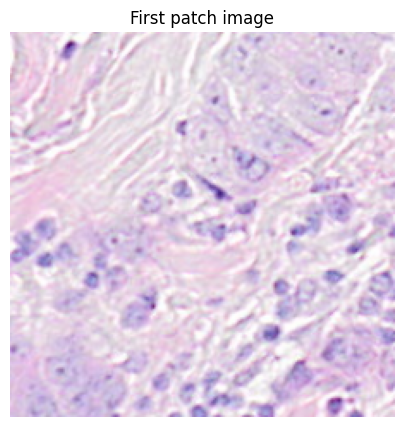

In [20]:
h5_path = "../../data/Brest_spatialTranscriptome/patches/NCBI776.h5"
with h5py.File(h5_path, "r") as f:
    # 각 데이터셋에 접근
    barcodes = f["barcode"][:]  # numpy array로 변환
    coords = f["coords"][:]
    images = f["img"][:]
    
    # 데이터 정보 확인
    print("Barcodes shape:", barcodes.shape, "dtype:", barcodes.dtype)
    print("Coords shape:", coords.shape, "dtype:", coords.dtype)
    print("Images shape:", images.shape, "dtype:", images.dtype)
    
    # 첫 몇 개 데이터 확인
    print("\nFirst 5 barcodes:", barcodes[:5])
    print("First 5 coords:", coords[:5])
    
    # 이미지가 있다면 첫 번째 이미지 시각화
    if len(images.shape) >= 3:
        plt.figure(figsize=(5, 5))
        plt.imshow(images[169])
        plt.title("First patch image")
        plt.axis('off')
        plt.show()


In [18]:
h5ad_path = "../../data/Brest_spatialTranscriptome/st/NCBI776.h5ad"  # 실제 경로로 변경
adata = ad.read_h5ad(h5ad_path)
print(adata)            # 요약 정보
print(adata.obs.head()) # 셀 메타데이터(관찰치)
print(adata.var.head()) # 유전자 메타데이터(변수)
X = adata.X   

AnnData object with n_obs × n_vars = 4992 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'pxl_row_in_fullres', 'pxl_col_in_fullres', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito'
    var: 'gene_ids', 'feature_types', 'genome', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'
                    in_tissue  array_row  array_col  pxl_row_in_fullres  \
AACACCTACTATCGAA-1          1          0        122                4636   
AACACGTGCATCGCAC-1          1         76         22               16640   
AACACTTGGCAAGGAA-1          1         47         71               12067   
AACAGGAAGAGCATAG-1          1         69          7               155

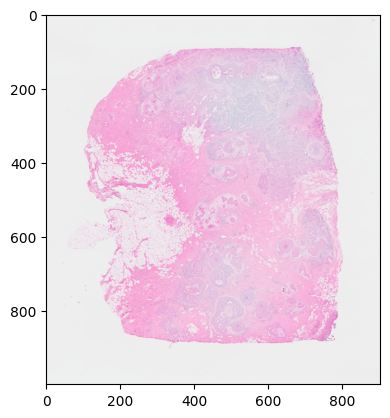

In [33]:
plt.imshow(adata.uns['spatial']['ST']['images']['downscaled_fullres'])  # 공간 정보 키 확인